# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


In [3]:
from pprint import pprint

test_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q={cities[0]}"
pprint(requests.get(test_url).json())

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 41.3712, 'lon': -73.414},
 'dt': 1699500360,
 'id': 5282297,
 'main': {'feels_like': 275.45,
          'humidity': 58,
          'pressure': 1016,
          'temp': 276.75,
          'temp_max': 278.35,
          'temp_min': 275.51},
 'name': 'Bethel',
 'sys': {'country': 'US',
         'id': 2004826,
         'sunrise': 1699443196,
         'sunset': 1699479693,
         'type': 2},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 40, 'speed': 1.54}}


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat'] 
        city_lng = city_weather['coord']['lon'] 
        city_max_temp = city_weather['main']['temp_max'] 
        city_humidity = city_weather['main']['humidity'] 
        city_clouds = city_weather['clouds']['all'] 
        city_wind = city_weather['wind']['speed'] 
        city_country = city_weather['sys']['country'] 
        city_date = city_weather['dt']

        ## Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | pakisaji
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | crucecita
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | yaren
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | codrington
Processing Record 11 of Set 1 | arauca
Processing Record 12 of Set 1 | mandiana
Processing Record 13 of Set 1 | antofagasta
Processing Record 14 of Set 1 | petropavlovsk-kamchatsky
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | udachny
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | keflavik
Processing Record 19 of Set 1 | saint-pierre
Processing Record 20 of Set 1 | argo
Processing Record 21 of Set 1 | iqaluit
Processing Record 22 of Set 1 | ribeira grande
P

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,5.20,58,100,1.54,US,1699500360
1,pakisaji,-8.0665,112.5981,32.11,47,99,2.35,ID,1699500498
2,port alfred,-33.5906,26.8910,12.32,94,29,4.62,ZA,1699500498
3,bredasdorp,-34.5322,20.0403,11.36,81,0,1.05,ZA,1699500372
4,crucecita,-28.9500,-58.9833,22.69,91,2,5.01,AR,1699500498


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,5.20,58,100,1.54,US,1699500360
1,pakisaji,-8.0665,112.5981,32.11,47,99,2.35,ID,1699500498
2,port alfred,-33.5906,26.8910,12.32,94,29,4.62,ZA,1699500498
3,bredasdorp,-34.5322,20.0403,11.36,81,0,1.05,ZA,1699500372
4,crucecita,-28.9500,-58.9833,22.69,91,2,5.01,AR,1699500498


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

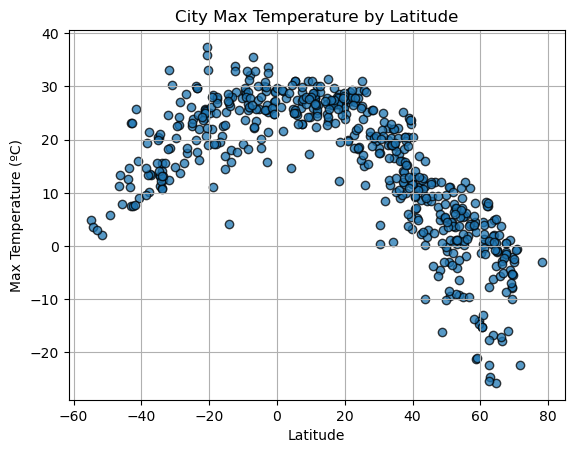

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'],alpha=0.75,edgecolors='black')

# Incorporate the other graph properties
plt.title("City Max Temperature by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (ºC)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

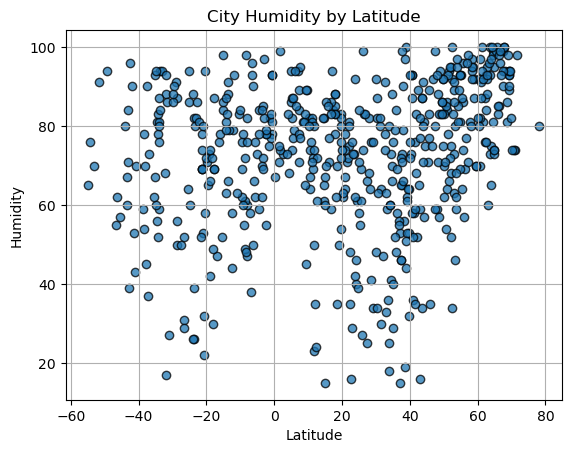

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'],alpha=0.75,edgecolors='black')

# Incorporate the other graph properties
plt.title("City Humidity by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

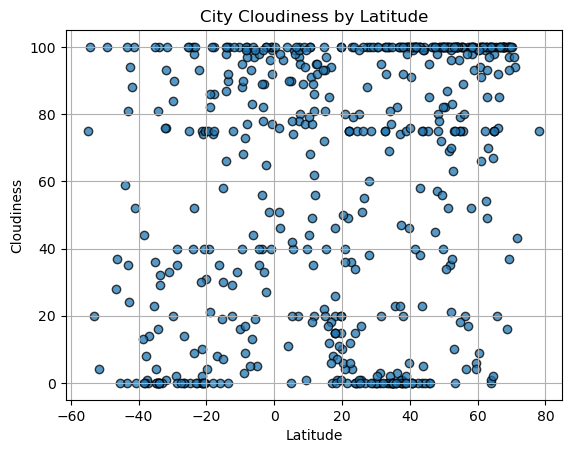

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'],alpha=0.75,edgecolors='black')


# Incorporate the other graph properties
plt.title("City Cloudiness by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

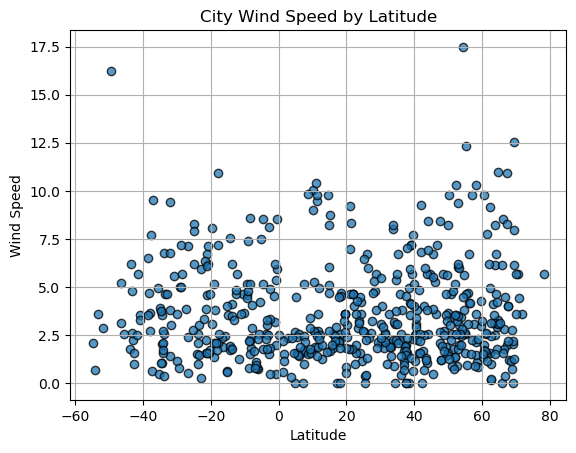

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'],alpha=0.75,edgecolors='black')

# Incorporate the other graph properties
plt.title("City Wind Speed by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [52]:
# Define a function to create Linear Regression plots
def get_regression(x_axis, y_axis):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    reg_plot = (slope * x_axis) + intercept

    eq_str = f"y = {round(slope,2)}x + {round(intercept,2)}"

    return {
        "slope": slope, 
        "intercept": intercept, 
        "rvalue": rvalue, 
        "pvalue": pvalue, 
        "stderr": stderr,
        "eq_str": eq_str,
        "reg_plot": reg_plot
        }
    
x_var = 'Lat'

In [53]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df[x_var] >= 0),:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,5.20,58,100,1.54,US,1699500360
10,arauca,7.0847,-70.7591,25.98,94,20,0.00,CO,1699500499
11,mandiana,10.6333,-8.6833,25.96,64,68,1.89,GN,1699500500
13,petropavlovsk-kamchatsky,53.0452,158.6483,0.33,73,75,9.39,RU,1699500500
14,albany,42.6001,-73.9662,2.23,65,100,1.67,US,1699500488


In [54]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df[x_var] < 0),:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,pakisaji,-8.0665,112.5981,32.11,47,99,2.35,ID,1699500498
2,port alfred,-33.5906,26.8910,12.32,94,29,4.62,ZA,1699500498
3,bredasdorp,-34.5322,20.0403,11.36,81,0,1.05,ZA,1699500372
4,crucecita,-28.9500,-58.9833,22.69,91,2,5.01,AR,1699500498
5,ushuaia,-54.8000,-68.3000,4.81,65,75,2.06,AR,1699500348


###  Temperature vs. Latitude Linear Regression Plot

The R value is -0.8671388010898603


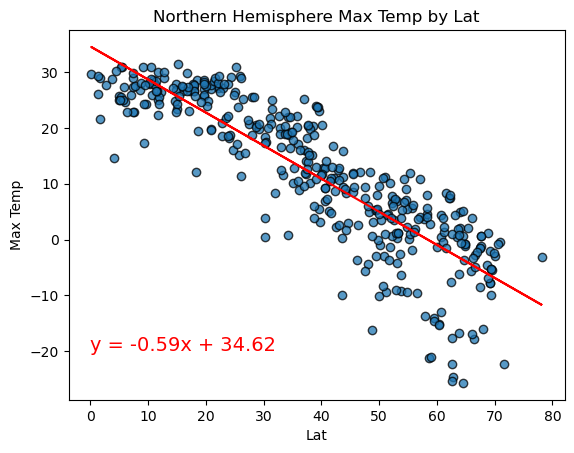

In [55]:
# Linear regression on Northern Hemisphere
y_var = 'Max Temp'
regr = get_regression(northern_hemi_df[x_var], northern_hemi_df[y_var])

plt.scatter(northern_hemi_df[x_var], northern_hemi_df[y_var], alpha=0.75, edgecolors='black')
plt.plot(northern_hemi_df[x_var], regr['reg_plot'], color='red')
plt.annotate(regr['eq_str'], (0,-20), fontsize=14, color='red')
plt.title(f"Northern Hemisphere {y_var} by {x_var}")
plt.xlabel(x_var)
plt.ylabel(y_var)

print(f"The R value is {regr['rvalue']}")
plt.show()

The R value is 0.6890418958861025


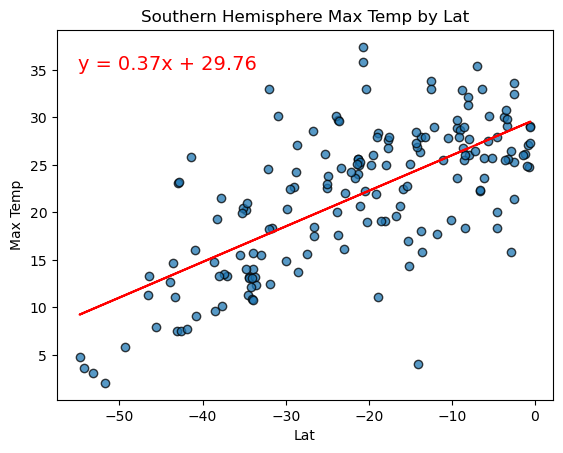

In [56]:
# Linear regression on Southern Hemisphere
regr = get_regression(southern_hemi_df[x_var], southern_hemi_df[y_var])

plt.scatter(southern_hemi_df[x_var], southern_hemi_df[y_var], alpha=0.75, edgecolors='black')
plt.plot(southern_hemi_df[x_var], regr['reg_plot'], color='red')
plt.annotate(regr['eq_str'], (-55, 35), fontsize=14, color='red')
plt.title(f"Southern Hemisphere {y_var} by {x_var}")
plt.xlabel(x_var)
plt.ylabel(y_var)

print(f"The R value is {regr['rvalue']}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The R value is 0.2997715423346841


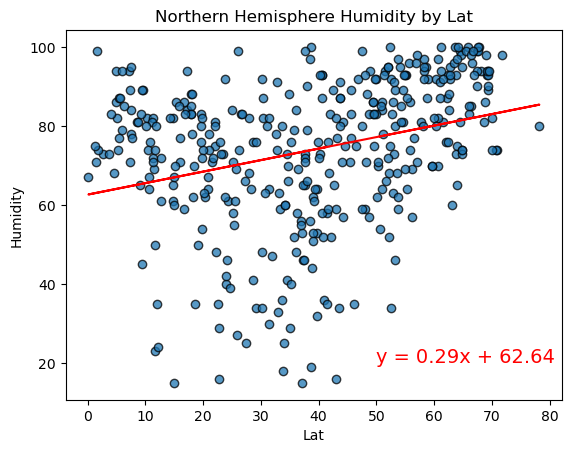

In [57]:
# Northern Hemisphere
y_var = 'Humidity'

regr = get_regression(northern_hemi_df[x_var], northern_hemi_df[y_var])

plt.scatter(northern_hemi_df[x_var], northern_hemi_df[y_var], alpha=0.75, edgecolors='black')
plt.plot(northern_hemi_df[x_var], regr['reg_plot'], color='red')
plt.annotate(regr['eq_str'], (50,20), fontsize=14, color='red')
plt.title(f"Northern Hemisphere {y_var} by {x_var}")
plt.xlabel(x_var)
plt.ylabel(y_var)

print(f"The R value is {regr['rvalue']}")
plt.show()

The R value is 0.08437659234664746


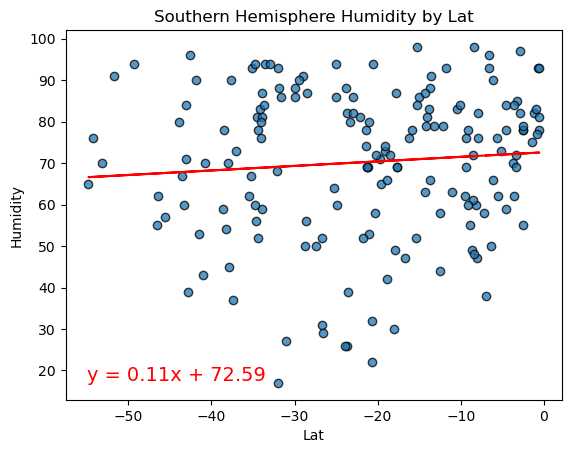

In [58]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
regr = get_regression(southern_hemi_df[x_var], southern_hemi_df[y_var])

plt.scatter(southern_hemi_df[x_var], southern_hemi_df[y_var], alpha=0.75, edgecolors='black')
plt.plot(southern_hemi_df[x_var], regr['reg_plot'], color='red')
plt.annotate(regr['eq_str'], (-55, 17.5), fontsize=14, color='red')
plt.title(f"Southern Hemisphere {y_var} by {x_var}")
plt.xlabel(x_var)
plt.ylabel(y_var)

print(f"The R value is {regr['rvalue']}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The R value is 0.26780296534426035


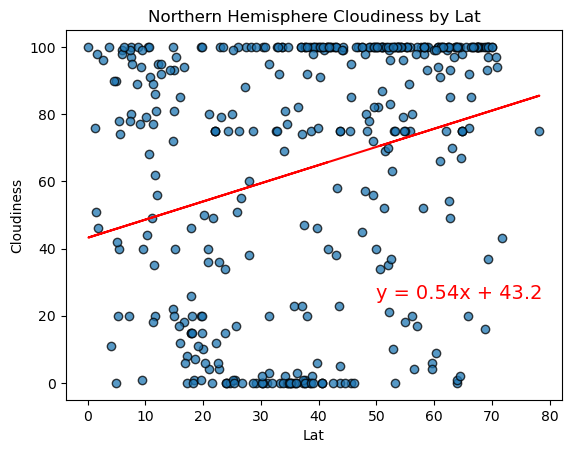

In [60]:
# Northern Hemisphere
y_var = 'Cloudiness'

regr = get_regression(northern_hemi_df[x_var], northern_hemi_df[y_var])

plt.scatter(northern_hemi_df[x_var], northern_hemi_df[y_var], alpha=0.75, edgecolors='black')
plt.plot(northern_hemi_df[x_var], regr['reg_plot'], color='red')
plt.annotate(regr['eq_str'], (50,25), fontsize=14, color='red')
plt.title(f"Northern Hemisphere {y_var} by {x_var}")
plt.xlabel(x_var)
plt.ylabel(y_var)

print(f"The R value is {regr['rvalue']}")
plt.show()

The R value is 0.2959503485778209


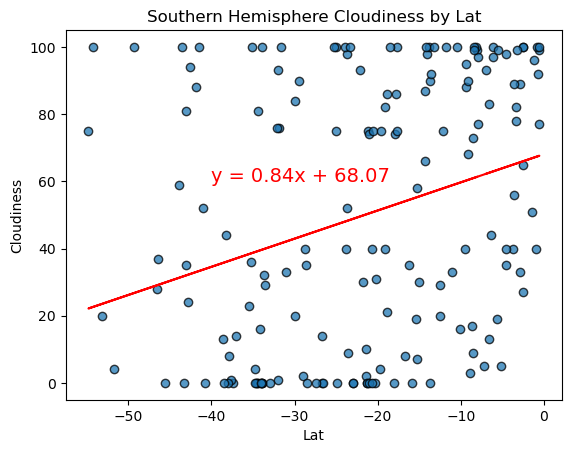

In [63]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
regr = get_regression(southern_hemi_df[x_var], southern_hemi_df[y_var])

plt.scatter(southern_hemi_df[x_var], southern_hemi_df[y_var], alpha=0.75, edgecolors='black')
plt.plot(southern_hemi_df[x_var], regr['reg_plot'], color='red')
plt.annotate(regr['eq_str'], (-40, 60), fontsize=14, color='red')
plt.title(f"Southern Hemisphere {y_var} by {x_var}")
plt.xlabel(x_var)
plt.ylabel(y_var)

print(f"The R value is {regr['rvalue']}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The R value is 0.11865252393905043


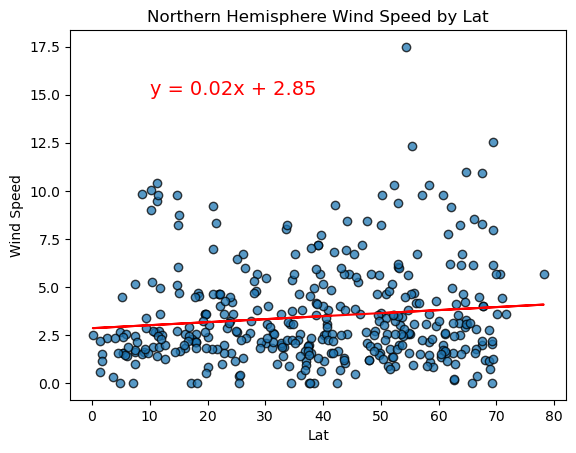

In [65]:
# Northern Hemisphere
y_var = 'Wind Speed'

regr = get_regression(northern_hemi_df[x_var], northern_hemi_df[y_var])

plt.scatter(northern_hemi_df[x_var], northern_hemi_df[y_var], alpha=0.75, edgecolors='black')
plt.plot(northern_hemi_df[x_var], regr['reg_plot'], color='red')
plt.annotate(regr['eq_str'], (10, 15), fontsize=14, color='red')
plt.title(f"Northern Hemisphere {y_var} by {x_var}")
plt.xlabel(x_var)
plt.ylabel(y_var)

print(f"The R value is {regr['rvalue']}")
plt.show()

The R value is -0.045719162233792444


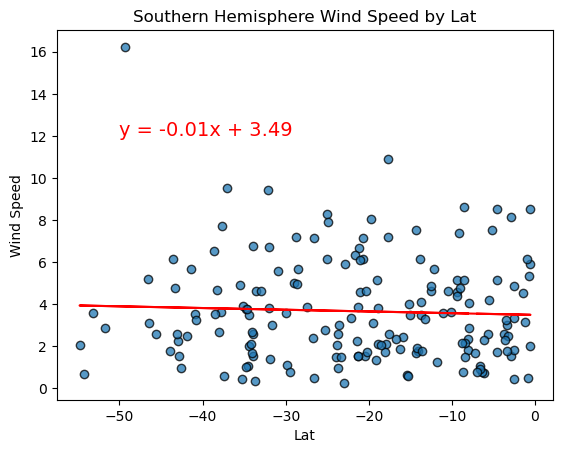

In [67]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
regr = get_regression(southern_hemi_df[x_var], southern_hemi_df[y_var])

plt.scatter(southern_hemi_df[x_var], southern_hemi_df[y_var], alpha=0.75, edgecolors='black')
plt.plot(southern_hemi_df[x_var], regr['reg_plot'], color='red')
plt.annotate(regr['eq_str'], (-50, 12), fontsize=14, color='red')
plt.title(f"Southern Hemisphere {y_var} by {x_var}")
plt.xlabel(x_var)
plt.ylabel(y_var)

print(f"The R value is {regr['rvalue']}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE